In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten, Dense
from keras.layers import BatchNormalization, LayerNormalization
from keras import regularizers

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras_tuner import HyperParameters, BayesianOptimization
from keras.regularizers import l2
import keras_tuner
import keras


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


import scipy.interpolate as interp
#import lalsimulation as lal
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
import keras
from keras import metrics
import keras_metrics as km
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt
import pathlib 
import shutil
import tempfile
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
#gpu configuration:

gpu_num = 0

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_visible_devices(gpus[gpu_num], 'GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
#import lal

2025-01-03 20:19:16.320543: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 20:19:16.365527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-03 20:19:17.039788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2 Physical GPUs, 2 Logical GPUs
Visible devices cannot be modified after being initialized


2025-01-03 20:19:22.585901: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46772 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:3b:00.0, compute capability: 8.6
2025-01-03 20:19:22.587683: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46772 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [5]:
import os
file_path = os.path.join('/home/smith26/public_html/el-nseos-mll', 'preprocessing.csv')
df = pd.read_csv(file_path, index_col = 0)
df

m1        m2        l1        l2    gamma0  logp1_cgs    gamma1  \
0      1.704363  0.940013  1.686090  3.498810  2.749811  35.365482  4.163723   
1      0.674195  0.488352  4.630310  5.249203  3.595422  34.654207  3.981949   
2      1.944506  1.625537  2.224806  2.701013  3.520350  35.396764  4.952541   
3      0.582582  0.362044  4.685642  5.651456  2.917128  35.255684  1.149857   
4      2.684166  2.462512  1.709042  1.964290  4.252634  34.932686  3.321473   
...         ...       ...       ...       ...       ...        ...       ...   
49995  1.093111  0.866491  1.965994  2.528221  3.791754  33.440527  4.773079   
49996  0.450100  0.421913  3.340404  4.616534  2.362006  33.940821  2.777913   
49997  1.229125  0.916376  2.503452  3.099723  3.293796  33.026767  4.130634   
49998  0.884386  0.667397  2.974374  5.247997  4.598794  35.306336  3.806648   
49999  2.689961  0.624463  3.588572  4.208695  4.750452  34.792232  4.234088   

       logp2_cgs    gamma2  
0      35.765971  1.138051  
1      34.993765  1.593887  
2      36.017062  1.272790  
3      36.029744  1.967677  
4      35.708051  1.456522  
...          ...       ...  
49995  36.900283  1.091320  
49996  34.595926  1.535013  
49997  34.994576  2.092221  
49998  35.632485  1.049226  
49999  35.206430  1.144645  

[50000 rows x 9 columns]

normeddata = pd.DataFrame().reindex(columns=df.columns)
normeddata

In [3]:
normeddata = df.copy(deep = True )
normeddata

m1        m2        l1        l2    gamma0  logp1_cgs    gamma1  \
0      1.704363  0.940013  1.686090  3.498810  2.749811  35.365482  4.163723   
1      0.674195  0.488352  4.630310  5.249203  3.595422  34.654207  3.981949   
2      1.944506  1.625537  2.224806  2.701013  3.520350  35.396764  4.952541   
3      0.582582  0.362044  4.685642  5.651456  2.917128  35.255684  1.149857   
4      2.684166  2.462512  1.709042  1.964290  4.252634  34.932686  3.321473   
...         ...       ...       ...       ...       ...        ...       ...   
49995  1.093111  0.866491  1.965994  2.528221  3.791754  33.440527  4.773079   
49996  0.450100  0.421913  3.340404  4.616534  2.362006  33.940821  2.777913   
49997  1.229125  0.916376  2.503452  3.099723  3.293796  33.026767  4.130634   
49998  0.884386  0.667397  2.974374  5.247997  4.598794  35.306336  3.806648   
49999  2.689961  0.624463  3.588572  4.208695  4.750452  34.792232  4.234088   

       logp2_cgs    gamma2  
0      35.765971  1.138051  
1      34.993765  1.593887  
2      36.017062  1.272790  
3      36.029744  1.967677  
4      35.708051  1.456522  
...          ...       ...  
49995  36.900283  1.091320  
49996  34.595926  1.535013  
49997  34.994576  2.092221  
49998  35.632485  1.049226  
49999  35.206430  1.144645  

[50000 rows x 9 columns]

In [4]:
def normalizeandwhiten(x):
    gamma0_norm = (x['gamma0'] - 1) / (5 - 1)
    gamma1_norm = (x['gamma1'] - 1) / (5 - 1)
    gamma2_norm = (x['gamma2'] - 1) / (5 - 1)
    #normalizating p values
    logp1_cgs_norm = (x['logp1_cgs'] - 33) / (37 - 33)
    logp2_cgs_norm = (x['logp2_cgs'] - 33) / (37 - 33)
    return gamma0_norm, logp1_cgs_norm, gamma1_norm, logp2_cgs_norm, gamma2_norm
#print(gamma0_norm)
# call the function and save the normalized values to normeddata
normeddata['gamma0'], normeddata['logp1_cgs'], normeddata['gamma1'], normeddata['logp2_cgs'], normeddata['gamma2'] = normalizeandwhiten(normeddata)

def outputnorm(self, x):
    self = (x[self] - 1)/(5-1)

In [5]:
train_dataset = normeddata.sample(frac=0.8, random_state=1)
test_dataset = normeddata.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [7]:
train_copy = train_dataset.copy()
test_copy = test_dataset.copy()

In [8]:
train_label = train_copy.drop(columns = ['m1', 'm2', 'l1', 'l2']) #pandas with gamma0, gamma1, logp1, logp2, gamma2 large training
test_label = test_copy.drop(columns = ['m1', 'm2', 'l1', 'l2']) #pandas with gamma0, gamma1, logp1, logp2, gamma2 small testing

train_features = train_copy.drop(columns = ['gamma0', 'gamma1', 'gamma2', 'logp1_cgs', 'logp2_cgs']) #m1, m2, l1,l2 large
test_features = test_copy.drop(columns = ['gamma0', 'gamma1', 'gamma2', 'logp1_cgs', 'logp2_cgs']) #m1,m2,l1,l2 small


In [ ]:
plt.scatter(tr

array([[<Axes: title={'center': 'm1'}>]], dtype=object)

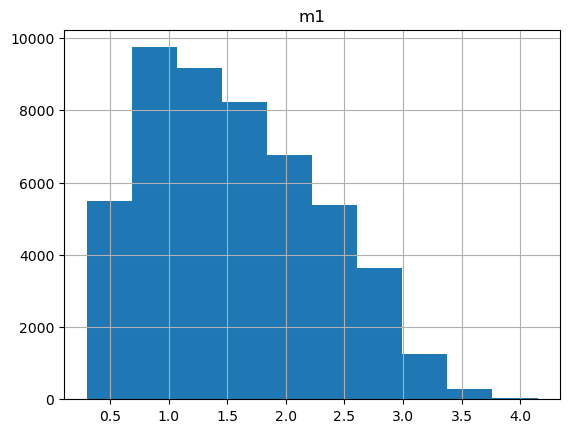

In [58]:
normeddata.hist(column = 'm1')
#plt.show()

array([[<Axes: title={'center': 'm2'}>]], dtype=object)

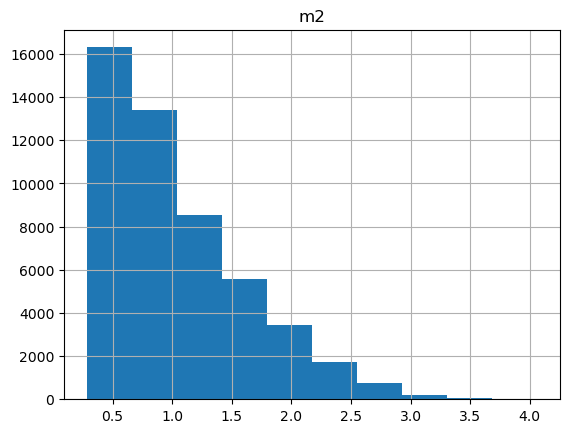

In [59]:
normeddata.hist(column = 'm2')

array([[<Axes: title={'center': 'l1'}>]], dtype=object)

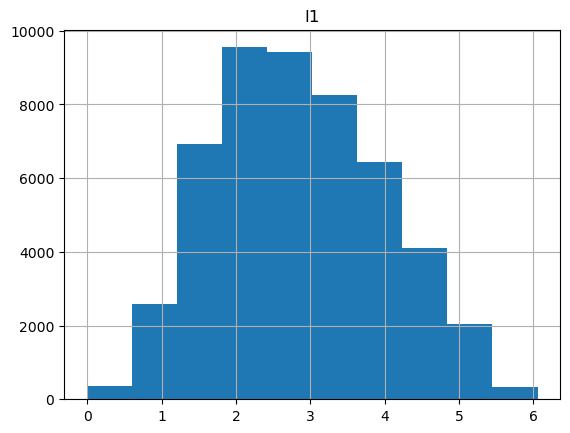

In [60]:
normeddata.hist(column = 'l1')

array([[<Axes: title={'center': 'l2'}>]], dtype=object)

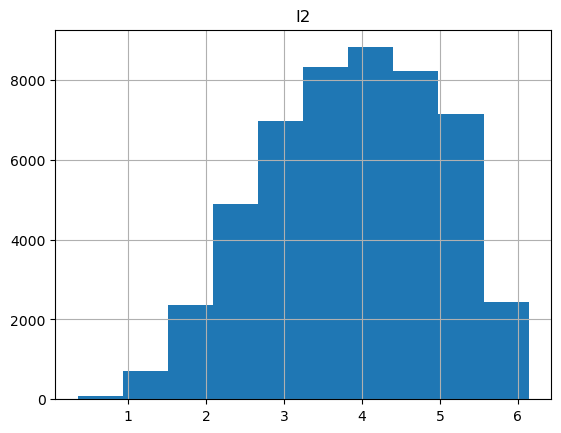

In [61]:
normeddata.hist(column = 'l2')

In [ ]:
plt.scatter(train_fea

class Normalize(tf.Module):
  def __init__(self, x):
    # get mean and standard dev
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    # normalize input
    return (x - self.mean)/self.std

  def unnorm(self, x):
    # unnorm input
    return (x * self.std) + self.mean

norm_x = Normalize(train_dataset)
x_train_norm = norm_x.norm(train_features)

In [32]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_features))   

In [36]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)

In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 50

# Create sequences for training set
X_train, y_train = create_sequences(train_data, seq_length)

# Create sequences for testing set
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
train_size = train_label.size

In [19]:
FEATURE_NAMES = [
    "m1",
    "l1",
    "m2",
    "l1",
]


def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(1,), dtype=tf.float32
        )
    return inputs

In [18]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [24]:
hidden_units = [8, 8]
learning_rate = 0.001
def run_experiment(model, loss, train_copy, test_copy):

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(train_copy, epochs=num_epochs, validation_data=test_copy)
    print("Model training finished.")
    _, rmse = model.evaluate(train_copy, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(test_copy, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")

In [25]:
def create_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)
    distribution_params = layers.Dense(units=2)(features)
    outputs = tfp.layers.IndependentNormal(1)(distribution_params) 
    # The output is deterministic: a single point estimate.
    outputs = layers.Dense(units=1)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [26]:
num_epochs = 500
train_sample_size = int(train_size * 0.3)
#small_train_dataset = train_dataset.unbatch().take(train_sample_size).batch(batch_size)

bnn_model_small = create_bnn_model(train_sample_size)
run_experiment(bnn_model_small, mse_loss, small_train_dataset, test_dataset)

AttributeError: 'DataFrame' object has no attribute 'unbatch'

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                 patience=200,
                                 min_delta=0.001, 
                                 mode='auto') 

In [15]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel = build_model,
    objective=  kt.Objective('mae', direction='min'),#'accuracy', #kt.Objective('cosine_similarity_metric', direction='max'),
    #batch_size = 32,
    #num_initial_points = 50,
    max_trials=1000,#500
    #executions_per_trial = 5,
    overwrite=True,
    #max_retries_per_trial = 5, 
    max_consecutive_failed_trials = 1000,
    #directory="my_dir",
    #project_name="tune_hypermodel",
    #    objective="val_accuracy",
    directory='my_dir', 
    project_name='my_project'

)

/home/smith26/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
tuner.search(train_features, 
             train_label,
             epochs=1000,#1000
             batch_size = 32,
             validation_split=.2, 
             callbacks=[callback])



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
11                |11                |input_size
False             |False             |norm_layer
64                |64                |size
3                 |3                 |kernel_size
elu               |elu               |activation
False             |False             |Dropout
False             |False             |pool
True              |True              |batch
False             |False             |maxpool
False             |False             |finaldense
0.000276          |0.000276          |lr

Epoch 1/1000


I0000 00:00:1719926505.528159 2785253 service.cc:145] XLA service 0x1511b0002ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719926505.528193 2785253 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1719926505.528196 2785253 service.cc:153]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-07-02 08:21:45.581295: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-02 08:21:45.764724: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  88/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2330 - mae: 0.6085

I0000 00:00:1719926506.672407 2785253 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0878 - mae: 0.3336 - val_loss: 0.0350 - val_mae: 0.2239
Epoch 2/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0256 - mae: 0.1869 - val_loss: 0.0347 - val_mae: 0.2081
Epoch 3/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0255 - mae: 0.1868 - val_loss: 0.0258 - val_mae: 0.1872
Epoch 4/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0253 - mae: 0.1854 - val_loss: 0.0269 - val_mae: 0.1886
Epoch 5/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0255 - mae: 0.1870 - val_loss: 0.0272 - val_mae: 0.1892
Epoch 6/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0257 - mae: 0.1875 - val_loss: 0.0260 - val_mae: 0.1869
Epoch 7/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0255 - mae: 0.1868 - val_loss: 0.0310 - val_mae: 0.1983
Epoch 8/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0254 - mae: 0.1861 - val_loss: 0.0259 - val_mae: 0.1880
Epoch 9/1000
1000/1000 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
test_predictions = model.predict(train_features)

In [ ]:
print(test_predictions)

In [ ]:
lab_max = normeddata['gamma0'].max()
lab_min = normeddata['gamma0'].min()
lab_range = lab_max - lab_min
lab_mean = normeddata['gamma0'].mean()
print(lab_max, lab_min, lab_range, lab_mean)

In [ ]:
pred_max = test_predictions[:, [0]].max()
pred_min = test_predictions[:, [0]].min()
pred_range = pred_max - pred_min
pred_mean = test_predictions[:, [0]].mean()
print(pred_max, pred_min, pred_range, pred_mean)

In [ ]:
predictions_array_length = 40000
numcols = 10
array_sizes =  np.array([[0] * numcols ] * predictions_array_length,dtype='float64')
predictions = pd.DataFrame(array_sizes)
predictions.columns = [ 'gamma0_norm_predicted', 'logp1_cgs_norm_predicted', 'gamma1_norm_predicted', 'logp2_cgs_norm_predicted', 'gamma2_norm_predicted', 'gamma0_predicted', 'logp1_cgs_predicted', 'gamma1_predicted','logp2_cgs_predicted', 'gamma2_predicted']

In [ ]:
predictions['gamma0_norm_predicted'] = test_predictions[:, [0]]
#predictions['logp1_cgs_norm_predicted'] = test_predictions[:, [1]]
#predictions['gamma1_norm_predicted'] = test_predictions[:, [2]]
#predictions['logp2_cgs_norm_predicted'] = test_predictions[:, [3]]
#predictions['gamma2_norm_predicted'] = test_predictions[:, [4]]
predictions

In [ ]:
predictions['gamma0_predicted'] = test_predictions[:, [0]] * (5 - 1) + 1
#predictions['logp1_cgs_predicted'] = test_predictions[:, [1]] *  (37 - 33) + 33
#predictions['gamma1_predicted'] = test_predictions[:, [2]] * (5 - 1) + 1
#predictions['logp2_cgs_predicted'] = test_predictions[:, [3]] *  (37 - 33) + 33
#predictions['gamma2_predicted'] = test_predictions[:, [4]] * (5 - 1) + 1
predictions

In [6]:
from plots.plots import my_beautiful_scatter_plots


ModuleNotFoundError: No module named 'plots'

In [ ]:
error = test_predictions - train_label
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels_cols = ['gamma0', 'logp1_cgs', 'gamma1', 'logp2_cgs', 'gamma2']
norm_labels = ['gamma0', 'logp1_cgs', 'gamma1', 'logp2_cgs', 'gamma2']

norm_predictions = ['gamma0_norm_predicted', 'logp1_cgs_norm_predicted', 'gamma1_norm_predicted', 'logp2_cgs_norm_predicted', 'gamma2_norm_predicted']
predictions_cols = ['gamma0_predicted', 'logp1_cgs_predicted', 'gamma1_predicted', 'logp2_cgs_predicted', 'gamma2_predicted']


labels = [df[col].to_numpy() for col in labels_cols]
normlabel = [normeddata[col].to_numpy() for col in norm_labels]

normpredictions = [predictions[col].to_numpy() for col in norm_predictions]
prediction = [predictions[col].to_numpy() for col in predictions_cols]


fig, axs = plt.subplots(5, 4, figsize=(15, 15))

for i in range(5):
    for j in range(4):
        if j == 0:  #first column i want to be gamma0_labels
            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(labels[i], color=color, range=(np.min(labels[i]), np.max(labels[i])))
            axs[i, j].set_title(f"Labels Unnormalized ({labels_cols[i]}) ")
            
        elif j == 1:  #second column should be the gamm0 predictions

            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(normlabel[i], color=color,range=(np.min(normlabel[i]), np.max(normlabel[i])))
            axs[i, j].set_title(f"Normalized Labels ({norm_labels[i]}) ")
    
          
        elif j == 2:  #3rd column should be the norm labels 
            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(normpredictions[i], color=color,range=(np.min(normlabel[i]), np.max(normlabel[i])))
            axs[i, j].set_title(f"Normalized Pred. ({norm_predictions[i]}) ")
            
        
        elif j == 3: # 4th column should be the norm predictions

            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(prediction[i], color=color,range=(np.min(labels[i]), np.max(labels[i])))
            axs[i, j].set_title(f"Unnormalized Pred. ({predictions_cols[i]}) ")

plt.tight_layout()
plt.subplots_adjust(top=.94) 
fig.suptitle('predicting one output, cosine sim', fontsize=20)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels_cols = ['gamma0', 'logp1_cgs', 'gamma1', 'logp2_cgs', 'gamma2']
norm_labels = ['gamma0', 'logp1_cgs', 'gamma1', 'logp2_cgs', 'gamma2']

norm_predictions = ['gamma0_norm_predicted', 'logp1_cgs_norm_predicted', 'gamma1_norm_predicted', 'logp2_cgs_norm_predicted', 'gamma2_norm_predicted']
predictions_cols = ['gamma0_predicted', 'logp1_cgs_predicted', 'gamma1_predicted', 'logp2_cgs_predicted', 'gamma2_predicted']


labels = [df[col].to_numpy() for col in labels_cols]
normlabel = [normeddata[col].to_numpy() for col in norm_labels]

normpredictions = [predictions[col].to_numpy() for col in norm_predictions]
prediction = [predictions[col].to_numpy() for col in predictions_cols]


fig, axs = plt.subplots(5, 4, figsize=(15, 15))

for i in range(5):
    for j in range(4):
        if j == 0:  #first column i want to be gamma0_labels
            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(labels[i], color=color)#, range=(np.min(labels[i]), np.max(labels[i])))
            axs[i, j].set_title(f"Labels Unnormalized ({labels_cols[i]}) ")
            
        elif j == 1:  #second column should be the gamm0 predictions

            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(normlabel[i], color=color) #range=(np.min(normlabel[i]), np.max(normlabel[i])))
            axs[i, j].set_title(f"Normalized Labels ({norm_labels[i]}) ")
    
          
        elif j == 2:  #3rd column should be the norm labels 
            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(normpredictions[i], color=color)#, range=(np.min(normlabel[i]), np.max(normlabel[i])))
            axs[i, j].set_title(f"Normalized Pred. ({norm_predictions[i]}) ")
            
        
        elif j == 3: # 4th column should be the norm predictions

            color = 'red' if i == 0 else 'darkorange' if i == 1 else 'gold' if i == 2 else 'green' if i == 3 else 'mediumblue'
            axs[i, j].hist(prediction[i], color=color)#, range=(np.min(labels[i]), np.max(labels[i])))
            axs[i, j].set_title(f"Unnormalized Pred. ({predictions_cols[i]}) ")

plt.tight_layout()
plt.subplots_adjust(top=.94) 
fig.suptitle('predicting one output, cosine sim', fontsize=20)
plt.show()